In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

#ODE system
def func(t, v, sigma, r, b):
    x, y, z = v #unpack the variables
    return [ sigma * (y - x), r * x - y - x * z, x * y - b * z ]

#Jacobian matrix
def JM(v, sigma, r, b):
    x, y, z = [k for k in v]
    return np.array([[-sigma, sigma, 0], [r - z, -1, -x], [y, x, -b]])

#initial parameters
sigma = 10
r = 28
b = 8/3

U = np.eye(3) #unit blob
v0 = np.ones(3) #initial condition
lyap = [] #empty list to store the lengths of the orthogonal axes

iters=10**6
dt=0.00001
tf=iters * dt

#integrate the ODE system -- hopefully falls into an attractor
sol = solve_ivp(func, [0, tf], v0, t_eval=np.linspace(0, tf, iters), args=(sigma, r, b))
v_n = sol.y.T #transpose the solution

#do this for each iteration
for k in range(0, iters):
    v0 = v_n[k] #new v0 after iteration
    U_n = np.matmul(np.eye(3) + JM(v0, sigma, r, b) * dt, U)

    #do a Gram-Schmidt Orthogonalisation (GSO)
    Q, R = np.linalg.qr(U_n)
    lyap.append(np.log(abs(R.diagonal())))

    U = Q #new axes after iteration

[sum([lyap[k][j] for k in range(iters)]) / (dt * iters) for j in range(3)]

[-0.011326266915360438, -0.15469431221954583, -13.500623607835877]

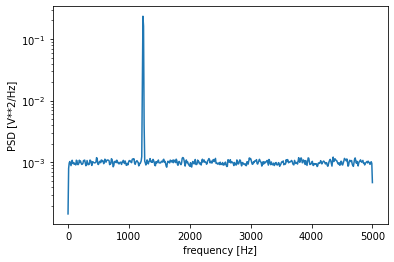

(100000,)


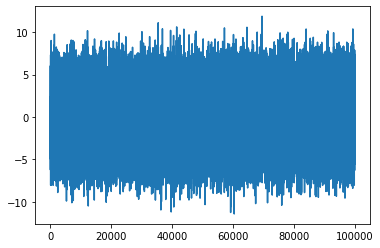

In [19]:
from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)
# plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

print(x.shape)
plt.plot(x)